# Titanic dataset is analysed.

In [84]:
# Importing pandas, numpy, matpotlib & seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [85]:
# Reading the titanic-data.csv file
titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
# Finding out if there are misisng values in any cloumn

titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

From the above output, it appears that column 'Age', 'Cabin' and 'Embarked' has missing values.

In [87]:
# Finding out the missing value count in each column

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns 'Age', 'Cabin' and 'Embarked' has missing values as seen above. 'Age' has 177, 'Cabin' has 687, 'Embarked' has 2 missing values. Cabin colummn has lot of missing values, so we would not treat Cabin cloumn for our analysis.

We would work on column 'Age' and 'Embarked' missing values. 

There are two ways in which we could deal with missing values of column 'Age'. One, is to the fill in the missing values of the column 'Age' with mean, median or mode. But filling in missing values in the 'Age' column artificially affects the distribution. This could  mislead the entire analysis and could affect the prediction. Therefore, it becomes tricky to infer things about the true Age variable and its relationships with other variables. Another way, is to drop out the missing values of column 'Age'. Though, this would result in a slightly smaller data set but may be more representative of the whole population and would provide the true Age values. So, we would work on 'Age' column by droping out the misisng values as it would better provide the actual sense of data.

For 'Embarked' Column, we would fill in the missing value by the most occuring value of the column as there are only 2 values which are missing and it would not affect the distribution of the data.

In [88]:
#Finding out the mode of Column Embarked and filling the missing value.
titanic_df.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

As we can see, S i.e Southampton has maximum occuring value. so we would fill the missing values in Cloumn Embarked with S.

In [89]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

In [90]:
#Running the below code again to check if there are any null values more in Embarked Column.
print titanic_df.isnull().sum()
print '\n '
print 'Below is Size of group of values in Embarked Column after replacing missing values'
print '\n'
print titanic_df.groupby('Embarked').size()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

 
Below is Size of group of values in Embarked Column after replacing missing values


Embarked
C    168
Q     77
S    646
dtype: int64


In [91]:
# Grouping the data as per Survived variable and describing it.
titanic_df.groupby('Survived').describe()


Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  549.000000  549.000000   549.000000  549.000000   
         mean    30.626179   22.117887    0.329690   447.016393    2.531876   
         std     14.172110   31.388207    0.823166   260.640469    0.735805   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.854200    0.000000   211.000000    2.000000   
         50%     28.000000   10.500000    0.000000   455.000000    3.000000   
         75%     39.000000   26.000000    0.000000   675.000000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  290.000000  342.000000  342.000000   342.000000  342.000000   
         mean    28.343690   48.395408    0.464912   444.368421    1.950292   
         std     14.950952   66.596998    0.771712   252.358840    0.863321   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   12.475000    0.000000   250.750000    1.000000   
         50%     28.000000   26.000000    0.000000   439.500000    2.000000   
         75%     36.000000   57.000000    1.000000   651.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  549.000000  
         mean     0.553734  
         std      1.288399  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      8.000000  
1        count  342.000000  
         mean     0.473684  
         std      0.708688  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      4.000000

In [92]:
# making 2 dataframe for survived data and non_survived data.

non_survived_data = titanic_df[titanic_df['Survived']==0]
survived_data = titanic_df[titanic_df['Survived']==1] 

# Does Age had any affect on survival?

In [93]:
#Droping out the missing values in column 'Age'
#Calculating ages info. of survivors and non_survivors 
#Decription of the survived_ages and non_survived_ages

survived_ages=survived_data['Age'].dropna()
print survived_ages.describe()

print '\n'

non_survived_ages = non_survived_data['Age'].dropna()
print non_survived_ages.describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


In the above cell, we have dropped out the missing values in column 'Age'. 

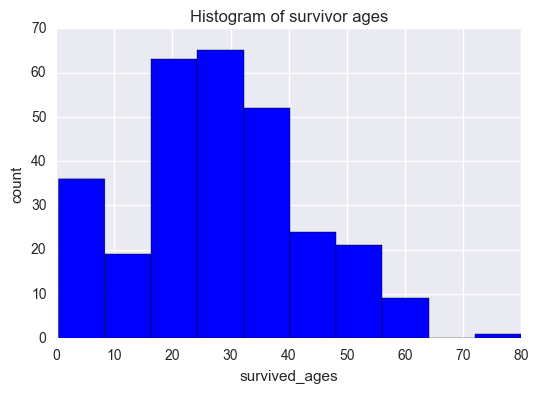

In [94]:
#Histogram of survived_ages

plt.hist(survived_ages,color=['blue'])
plt.xlabel('survived_ages')
plt.ylabel('count')
plt.title('Histogram of survivor ages')
plt.show()


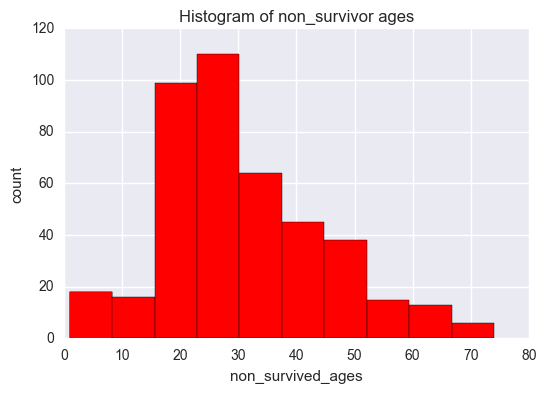

In [95]:
#Histogram of non_survived_ages

plt.hist(non_survived_ages,color=['red'])
plt.xlabel('non_survived_ages')
plt.ylabel('count')
plt.title('Histogram of non_survivor ages')
plt.show()

From the above describe() info. and Histogram, its appears -

i) Mean Age of survived passengers was 28.34 years whereas Mean Age of non_survived passenegers was 30.62 years which are almost same.


ii) std deviation of both the survived and non_survived passengers is between 14-15. Mean value of one group falls within one standard deviation away from the mean of the other group.


iii) Histogram of both the survived_ages and non_survived_ages appears to approx. same.

From the above finding, it doesn't seem that the age is a significant decideing factor on the survival of the passengers.


# Does Gender had any affect on survival?


In [96]:
#Grouping the dataframe by Gender and Survived

titanic_df.groupby(['Sex','Survived']).describe()

Age        Fare       Parch  PassengerId  \
Sex    Survived                                                          
female 0        count   64.000000   81.000000   81.000000    81.000000   
                mean    25.046875   23.024385    1.037037   434.851852   
                std     13.618591   24.821287    1.391442   263.522063   
                min      2.000000    6.750000    0.000000    15.000000   
                25%     16.750000    8.850000    0.000000   206.000000   
                50%     24.500000   15.245800    0.000000   420.000000   
                75%     33.250000   27.900000    2.000000   643.000000   
                max     57.000000  151.550000    6.000000   889.000000   
       1        count  197.000000  233.000000  233.000000   233.000000   
                mean    28.847716   51.938573    0.515021   429.699571   
                std     14.175073   64.102256    0.820527   255.048296   
                min      0.750000    7.225000    0.000000     2.000000   
                25%     19.000000   13.000000    0.000000   238.000000   
                50%     28.000000   26.000000    0.000000   400.000000   
                75%     38.000000   76.291700    1.000000   636.000000   
                max     63.000000  512.329200    5.000000   888.000000   
male   0        count  360.000000  468.000000  468.000000   468.000000   
                mean    31.618056   21.960993    0.207265   449.121795   
                std     14.056019   32.409799    0.601382   260.365260   
                min      1.000000    0.000000    0.000000     1.000000   
                25%     21.750000    7.795800    0.000000   212.500000   
                50%     29.000000    9.416650    0.000000   461.000000   
                75%     39.250000   26.000000    0.000000   678.500000   
                max     74.000000  263.000000    5.000000   891.000000   
       1        count   93.000000  109.000000  109.000000   109.000000   
                mean    27.276022   40.821484    0.357798   475.724771   
                std     16.504803   71.355967    0.645826   244.717482   
                min      0.420000    0.000000    0.000000    18.000000   
                25%     18.000000    9.500000    0.000000   272.000000   
                50%     28.000000   26.287500    0.000000   508.000000   
                75%     36.000000   39.000000    1.000000   680.000000   
                max     80.000000  512.329200    2.000000   890.000000   

                           Pclass       SibSp  
Sex    Survived                                
female 0        count   81.000000   81.000000  
                mean     2.851852    1.209877  
                std      0.450309    1.814635  
                min      1.000000    0.000000  
                25%      3.000000    0.000000  
                50%      3.000000    1.000000  
                75%      3.000000    1.000000  
                max      3.000000    8.000000  
       1        count  233.000000  233.000000  
                mean     1.918455    0.515021  
                std      0.834211    0.737533  
                min      1.000000    0.000000  
                25%      1.000000    0.000000  
                50%      2.000000    0.000000  
                75%      3.000000    1.000000  
                max      3.000000    4.000000  
male   0        count  468.000000  468.000000  
                mean     2.476496    0.440171  
                std      0.761411    1.138507  
                min      1.000000    0.000000  
                25%      2.000000    0.000000  
                50%      3.000000    0.000000  
                75%      3.000000    0.000000  
                max      3.000000    8.000000  
       1        count  109.000000  109.000000  
                mean     2.018349    0.385321  
                std      0.922774    0.636952  
                min      1.000000    0.000000  
                25%      1.000000    0.000000  
                50%      

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64
Axes(0.125,0.125;0.775x0.775)


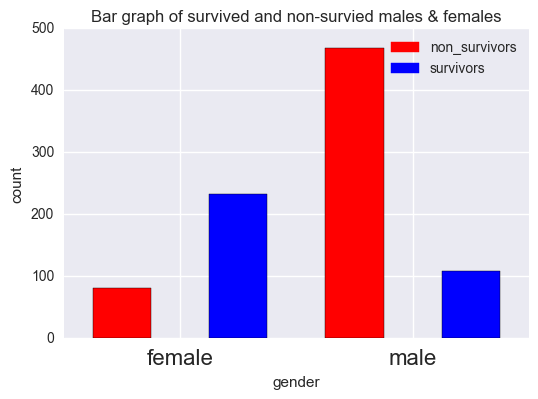

In [97]:
#getting survived and non_survived female and male counts and plotting their bar graph.
print titanic_df.groupby(['Sex','Survived'])['Sex'].count()
print titanic_df.groupby(['Sex','Survived'])['Sex'].count().plot.bar(color=['red','blue'])
plt.ylabel('count')
plt.xlabel('gender')
plt.title('Bar graph of survived and non-survied males & females')
x=[0.5,2.5]
#labels=['female non-survived','female survived','male non-survived','male survived']
labels=['female','male']
plt.xticks(x,labels,rotation='horizontal',fontsize=16)
red_patch = mpatches.Patch(color='red', label='non_survivors')
blue_patch = mpatches.Patch(color='blue', label='survivors')
plt.legend(handles=[red_patch,blue_patch])
plt.show()


From the above bar plot it appears that number of females survived(233) was more than number of males survived(109). Whereas, number of females that did not survived(81) was less than the number of males that did not survived(468).
We can see that about 74% of the females survived wheres only 19% of the males survived.

Did it happen by chance that more females survived than males or gender played an role in survival?


In [98]:
titanic_df.groupby(['Sex',])['Survived'].describe()

Sex          
female  count    314.000000
        mean       0.742038
        std        0.438211
        min        0.000000
        25%        0.000000
        50%        1.000000
        75%        1.000000
        max        1.000000
male    count    577.000000
        mean       0.188908
        std        0.391775
        min        0.000000
        25%        0.000000
        50%        0.000000
        75%        0.000000
        max        1.000000
Name: Survived, dtype: float64

For this, we need to perform hypothesis testing on whether gender plays a role in survival of the passengers.
Here, we have proportions of survived passengers i.e. survived females and survived males. Therefore, we could  perform Z test for comparing two proportions.

The null hypothesis of this z test would be that there is no significant difference in survival proportions of females and males.

H0: prop_survived_female - prop_survived_male = 0

and alternate hypothesis would be that there is significant difference in survival proportions of females and males.

HA: prop_survived_female - prop_survived_male  ≠ 0

Also for alternate hypthesis, we aren't specifying which gender has more chance of survival.So, it is a non-directional test. 


In [99]:
# function for Z-test for comparing two proportions: 

def z_test_two_proportions(var1,var2,data1,data2):
    prop_var1 = data1.count()[var1]/np.float(data2.count()[var1])
    prop_var2 = data1.count()[var2]/np.float(data2.count()[var2])
    prop_combined_var1_var2=(data1.count()[var1] + np.float(data1.count()[var2]))/(data2.count()[var1] + np.float(data2.count()[var2]))
   
    count_var1 = data2.count()[var1]
    count_var2 = data2.count()[var2]
      
    std_error = np.sqrt((prop_combined_var1_var2*(1-prop_combined_var1_var2)*((1/np.float(count_var1)) + (1/np.float(count_var2)))))
    
    z_value = (prop_var1 - prop_var2) / std_error
    
    return z_value

In [100]:
#Calculating Z_value for two proportions of samples by calling the function z_test_two_proportions()

print 'z value is'
print z_test_two_proportions('female','male',survived_data.groupby(['Sex'])['Survived'],titanic_df.groupby(['Sex'])['Survived'])

z value is
16.2188339307


Now, for 95% confidence interval, our alpha level is 0.5 for 2 tailed test. So, our Z_critical value for alpha level of 0.25 in each tail is ±1.96 using the z-table here: http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf

Our z_value of 16.21 is way above the z_critical value.The two-tailed P value is less than 0.0001 . By conventional criteria, this difference is considered to be extremely statistically significant.Therefore, we would reject the null hypothesis in favour of the alternate and therefore, we can say with 95% confidence (based on our alpha level of .05) that there is a significant difference between survival proportions of females and male. So, gender made a difference in survival. (And in this case, since z_value is positive, a person was more likely to survive as a female than as a male. In this case, the reason could be that during the time of disaster, women and child were of first priority to make them safe). 



# Does Pclass had any affect on survival?

In [101]:
titanic_df.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       136  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

total number of passengers: 891


Count of each Pclass
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


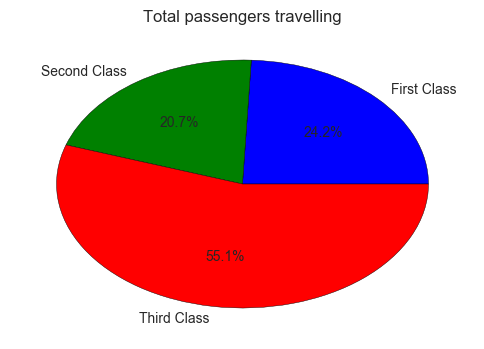

In [102]:
titanic_df.groupby('Pclass').count()['Survived'].plot.pie(labels =('First Class', 'Second Class', 'Third Class'),colors=('blue','green','red'),autopct='%1.1f%%')
print 'total number of passengers: {}'.format(titanic_df['Survived'].count())
print '\n'
print 'Count of each Pclass'
print titanic_df.groupby('Pclass').count()['Survived']
plt.title('Total passengers travelling')
plt.ylabel('')

As seen from above pie chart, out of 891 passengers


i) 216 were travelling in 1st class.


ii) 184 were travelling in 2nd class.


iii) 491 were travelling in 3rd class.

It can be observed, maximum passengers were of Pclass 3.

total number of survived passenger: 342


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


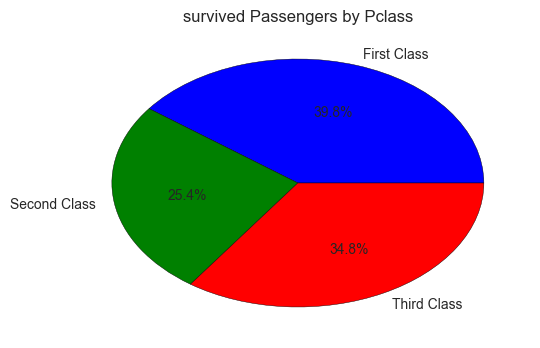

In [103]:
#Getting info with Survived_data

survived_data.groupby('Pclass').count()['Survived'].plot.pie(labels=('First Class', 'Second Class', 'Third Class'),colors=('blue','green','red'),autopct='%1.1f%%')
print 'total number of survived passenger: {}'.format(survived_data['Survived'].count())
print '\n'
print survived_data.groupby('Pclass').count()['Survived']
plt.title('survived Passengers by Pclass')
plt.ylabel('')

From the above plot, it can be observed that maximum number of First class passenegers survived i.e. 136.

total number of non_survived passenger: 549


Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64


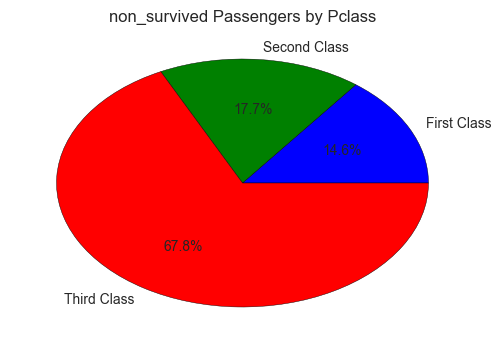

In [104]:
#Getting info with non_survived_data

non_survived_data.groupby('Pclass').count()['Survived'].plot.pie(labels=('First Class', 'Second Class', 'Third Class'),colors=('blue','green','red'),autopct='%1.1f%%')
print 'total number of non_survived passenger: {}'.format(non_survived_data['Survived'].count())
print '\n'
print non_survived_data.groupby('Pclass').count()['Survived']
plt.title('non_survived Passengers by Pclass')
plt.ylabel('')

It can be observed from the above plot that maximum number of 3rd class passengers didn't survived i.e. 372

In [105]:
#Survival rate within each group

(survived_data.groupby('Pclass').count()['Survived']/titanic_df.groupby('Pclass').count()['Survived'])*100


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

From the above cell, it can be observed that the maximum suvival rate among all 3 groups was of 1st class passengers.

In [106]:
titanic_df.groupby(['Pclass','Sex','Survived']).count()

PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Pclass Sex    Survived                                                       
1      female 0                   3     3    3      3      3       3     3   
              1                  91    91   82     91     91      91    91   
       male   0                  77    77   61     77     77      77    77   
              1                  45    45   40     45     45      45    45   
2      female 0                   6     6    6      6      6       6     6   
              1                  70    70   68     70     70      70    70   
       male   0                  91    91   84     91     91      91    91   
              1                  17    17   15     17     17      17    17   
3      female 0                  72    72   55     72     72      72    72   
              1                  72    72   47     72     72      72    72   
       male   0                 300   300  215    300    300     300   300   
              1                  47    47   38     47     47      47    47   

                        Cabin  Embarked  
Pclass Sex    Survived                   
1      female 0             3         3  
              1            78        91  
       male   0            56        77  
              1            39        45  
2      female 0             1         6  
              1             9        70  
       male   0             2        91  
              1             4        17  
3      female 0             2        72  
              1             4        72  
       male   0             4       300  
              1             2        47

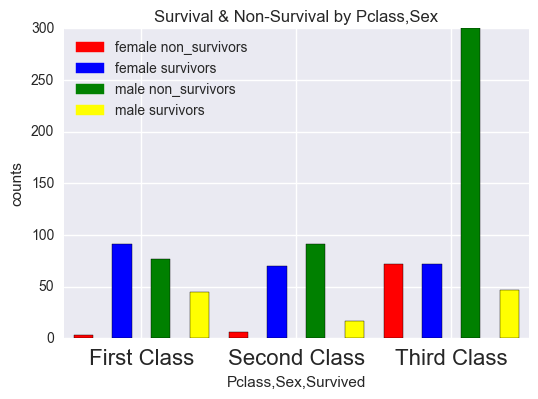

In [107]:
#Grouping the data by Pclass, Sex & Survived and taking a look at count.

titanic_df.groupby(['Pclass','Sex','Survived']).count()['PassengerId'].plot.bar(color=('red','blue','green','yellow'))
plt.ylabel('counts')
plt.title('Survival & Non-Survival by Pclass,Sex')
x=[1.5,5.5,9.5]
#labels=['1st class female non_survivors','1st class female survivors','1st class male non_survivors','1st class male survivors','2nd class female non_survivors','2nd class female survivors','2nd male non_survivors','2nd class male survivors','3rd class female non_survivors','3rd class female survivors','3rd class male non_survivors','3rd class male survivors']
labels=['First Class','Second Class','Third Class']
plt.xticks(x,labels,rotation='horizontal',fontsize=16)
red_patch = mpatches.Patch(color='red', label='female non_survivors')
blue_patch = mpatches.Patch(color='blue', label='female survivors')
green_patch = mpatches.Patch(color='green', label='male non_survivors')
yellow_patch = mpatches.Patch(color='yellow', label='male survivors')
plt.legend(handles=[red_patch,blue_patch,green_patch,yellow_patch],loc='best')
plt.show()

From the above bar graph, it appears that


i) the highest bar is of (3rd class male non_survivors) i.e. there was maximum number of male passengers of 3rd class which didn't survive.

ii) the lowest bar is of (1st class female non_survivors) i.e. there was minimum number of female passengers of 1st class which didn't survive.


iii) Also, for survived passengers, bar (1st class female survivors) is highest which means female passengers of 1st class survived the most.

iv) non-survival count of female & male increases as the Pclass category decreased. So, first preference were given to women & men of first class. See the pattern of red bars i.e. (1st class, 2nd class and 3rd class female non_survivors),. Similarly, see the pattern for green bars i.e. (1st class, 2nd class and 3rd class male non_survivors).


v) Though, distribution of survivors among female passengers across all 3 Pclass appears to be approx. same (see all the blue bars) but if we look at the female survivors within each Pclass(see red bar and blue bar as a set together), you would find that the difference between female survivors and female non-survivors increases rapidly as we increase the Pclass.So, most of the women from 1st class survived.

vi) Also, see the (green bar and yellow bar together), you would found the difference between male non-survivors and male survivors increases as we lower down the Pclass. So, most of the men from 3rd class didn't survived.

vii) Also, if you see all the blue bars i.e. (female survivors), the number of female passengers survived in each group was almost same.

# Does Embarked Station had any affect on survival?

In [108]:
#Defining function bar_plot_for_embarked for plotting bar graph for total passengers, survivors and non_survivors
def bar_plot_for_embarked(data,title,xlabel,ylabel):
    data.plot.bar(color=['Blue','Red','Green'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    x=[0,1,2]
    labels=['Cherbourg','Queenstown','Southampton']
    plt.xticks(x,labels,rotation='horizontal')
    red_patch = mpatches.Patch(color='red', label='Queenstown')
    blue_patch = mpatches.Patch(color='blue', label='Cherbourg')
    green_patch = mpatches.Patch(color='green', label='Southampton')
    plt.legend(handles=[blue_patch,red_patch,green_patch],loc='best')
    plt.show()

In [109]:
#Number of passengers boarded from each Embarked Station
titanic_df.groupby('Embarked').count()['PassengerId']

Embarked
C    168
Q     77
S    646
Name: PassengerId, dtype: int64

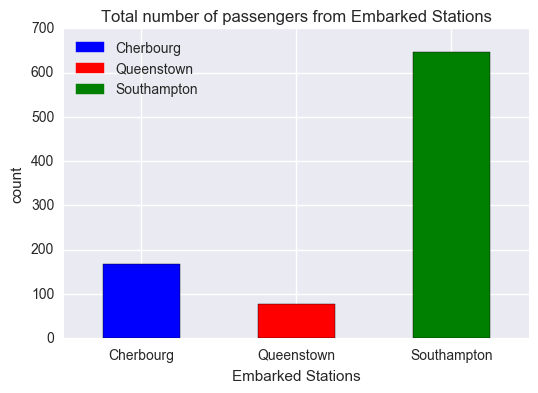

In [110]:
#Bar plot of passengers boarded from each Embarked station

bar_plot_for_embarked(titanic_df.groupby('Embarked').count()['PassengerId'],'Total number of passengers from Embarked Stations','Embarked Stations','count')

From the above data and bar plot - 

168 passengers boarded from Cherbourg.

77 passengers boarded from Queenstown.

646 passengers boarded from Southampton.

Most passengers embarked from Southampton

In [111]:
#count of survived passengers form Embarked stations

print 'survived passengers for Embarked Stations'
print survived_data.groupby('Embarked').count()['Survived']

survived passengers for Embarked Stations
Embarked
C     93
Q     30
S    219
Name: Survived, dtype: int64


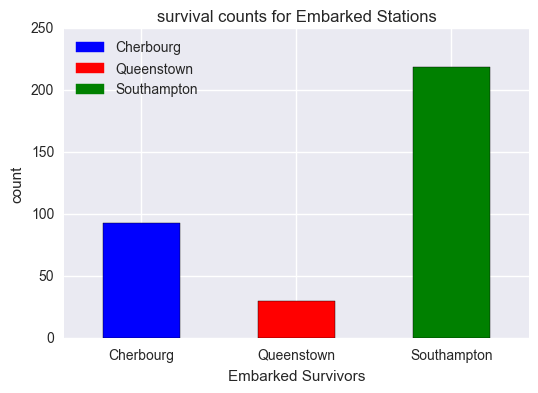

In [112]:
#Bar plot - count of survived passengers form Embarked stations
bar_plot_for_embarked(survived_data.groupby(['Embarked','Survived']).count()['PassengerId'],'survival counts for Embarked Stations','Embarked Survivors','count')

In [113]:
#count of non_survived passengers form Embarked stations

print 'non_survived passengers for Embarked Stations'
print non_survived_data.groupby('Embarked').count()['Survived']

non_survived passengers for Embarked Stations
Embarked
C     75
Q     47
S    427
Name: Survived, dtype: int64


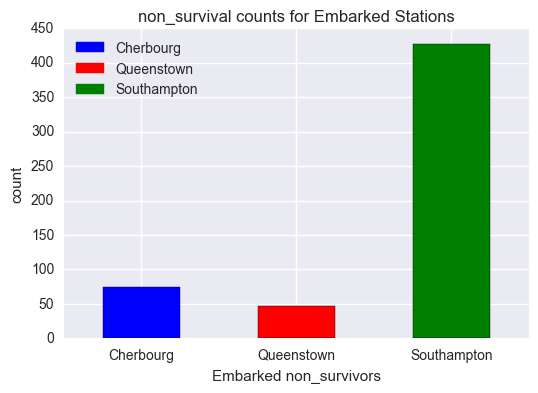

In [114]:
#Bar plot - count of non_survived passengers form Embarked stations

bar_plot_for_embarked(non_survived_data.groupby(['Embarked','Survived']).count()['PassengerId'],'non_survival counts for Embarked Stations','Embarked non_survivors','count')

The above 2 bar plots appears exactly same for survived and non-survived passengers from each of the embarked stations. 

In [115]:
# Survival rate of passengers from each Embarked stations

(survived_data.groupby('Embarked').count()['Survived']/titanic_df.groupby('Embarked').count()['Survived'])*100

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

Well, the survival rate of passengers onboarded from Cherbourg is higher than passengers boarded from Queenstown & Southampton.

So, is the survival rate of passengers onboarded from Cherbourg more due to random chane or is there something affecting it. We need to find out that is the survival rate difference between Cherbourg and (Queenstown & Southampton) significant or not?

In [116]:
# Mean survived passengers per Embarked station

titanic_df.groupby('Embarked').mean()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [117]:
# standard deviation of survived passenger per Embarked station

titanic_df.groupby('Embarked').std()['Survived']

Embarked
C    0.498608
Q    0.490860
S    0.473740
Name: Survived, dtype: float64

Since the average survived passengers for Queenstown and Southampton is nearly same.In this case, if we look at mean, then it is actually equal to the proption of the survived passengers to the total passengers in that group. We can run a Z test for comparing two survived proportions on either pair of (Cherbourg and Queenstown) or (Cherbourg and Southampton). It would be a non-directional 2 tailed test.


Let us run the Z test on proportion of (Cherbourg and Queenstown).
Our null hypothesis would be that there is no significant difference in proportion of survived passengers of Cherbourg and Queenstown.

H0: proportion_survived_Cherbourg - proportion_survived_Queenstown = 0

and alternate hypothesis would be that there is a significant difference in proportion of survived passengers of Cherbourg and Queenstown. 

HA: proportion_survived_Cherbourg - proportion_survived_Queenstown ≠ 0



In [118]:
# function for Z-test for comparing two proportions: 

def z_test_two_proportions(var1,var2,data1,data2):
    prop_var1 = data1.count()[var1]/np.float(data2.count()[var1])
    prop_var2 = data1.count()[var2]/np.float(data2.count()[var2])
    prop_combined_var1_var2=(data1.count()[var1] + np.float(data1.count()[var2]))/(data2.count()[var1] + np.float(data2.count()[var2]))
   
    count_var1 = data2.count()[var1]
    count_var2 = data2.count()[var2]
      
    std_error = np.sqrt((prop_combined_var1_var2*(1-prop_combined_var1_var2)*((1/np.float(count_var1)) + (1/np.float(count_var2)))))
    
    z_value = (prop_var1 - prop_var2) / std_error
    
    return z_value


In [119]:
#Calculating Z_value for two proportions of samples by calling the function z_test_two_proportions()

print 'z value is'
print z_test_two_proportions('C','Q',survived_data.groupby('Embarked')['Survived'],titanic_df.groupby('Embarked')['Survived'])

z value is
2.38281999745


Now, for 95% confidence interval, our alpha level is 0.5 for 2 tailed test. So, our Z_critical value for alpha level of  0.25 in each tail is ±1.96 using the z-table here: http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf

Our z_value of 2.38 is above the z_critical value of 1.96.The two-tailed P value equals 0.0173 and is considered to be statistically significant at alpha level of 0.5 for 2 tailed test. Therefore, we would reject the null hypothesis in favour of the alternate and therefore, we can say with 95% confidence (based on our alpha level of .05) that there is a significant difference between two proportions of survived passengers of Cherbourg and Queenstown.So, passengers onboarded from Cherbourg had a better survival rate and difference in proportions didn't occured by random chance. (And in this case, reason could be the that more 1st class passengers embarked from Cherbourg).



Lets find out the passenger's Pclass info for Embarked Station Cherbourg

In [120]:
#Mean Pclass of passengers embarking from different stations.

titanic_df.groupby('Embarked').mean()[['Survived','Pclass','Fare']]

,Survived,Pclass,Fare
Embarked,,,
C,0.553571,1.886905,59.954144
Q,0.389610,2.909091,13.276030
S,0.339009,2.346749,27.243651


We can clearly see that the average Pclass value for Cherbourg is much less than average Pclass values for Queenstown and Southampton. Average Pclass value for Cherbourg is 1.88 i.e. mostly the passengers which emabrked form this station belonged to Rich class or Upple class and that is confirmed by the average fare price of 59.95 for each Cherbourg passenger which is almost more than double than the average fare prices for other embarked stations.

In [121]:
#Taking another look at the Embarked station and Gender relationship with Pclass & Fare.

titanic_df.groupby(['Embarked','Sex']).mean()

PassengerId  Survived    Pclass        Age     SibSp  \
Embarked Sex                                                            
C        female   437.315068  0.876712  1.726027  28.344262  0.547945   
         male     451.536842  0.305263  2.010526  32.998841  0.263158   
Q        female   374.138889  0.750000  2.888889  24.291667  0.222222   
         male     456.317073  0.073171  2.926829  30.937500  0.609756   
S        female   438.780488  0.692683  2.185366  28.007979  0.829268   
         male     454.507937  0.174603  2.421769  30.291440  0.448980   

                    Parch       Fare  
Embarked Sex                          
C        female  0.493151  75.169805  
         male    0.263158  48.262109  
Q        female  0.222222  12.634958  
         male    0.121951  13.838922  
S        female  0.780488  39.143456  
         male    0.240363  21.711996

From the above table, it appears that - 

i) Female passengers of Cherbourg having average Pclass value = 1.72  had more survivors than females passengers from other embarked station. Also, their fare price was highest among others which was 75.1. So, the rich women embraked from Cherbourg.

ii) Male Passengers of Queenstown having average Pclass value = 2.92 had less survivors than male passengers from other embarked stations. Also, their fare price was second lowest among others which was 13.83. So, the poor men embarked from Queenstown.

# Conclusion:

Based upon the above analysis, out of factors(Age, Gender, Pclass & Embarked), Gender and Pclass were the factors that made a strong impact on the survival. Also, Embarked and Pclass seems to be related to each other in terms of the class of the passengers onboarding from a specific station. So, the passengers which are more likely to survive as per above analysis are 1st class female passengers. This analysis is tentative as we have also limitaions to this dataset.

First, the dataset is incomplete and consists of only 891 passengers as opposed to total of 2224 passenegers and crew aboard as per https://en.wikipedia.org/wiki/RMS_Titanic. We are not sure if the sample of 891 passengers is the the true representative of the population. Also, few variables had missing values and i had replaced the missing values with either mean or mode to have the same length of dataset rather than omitting the missing values. Replacing the values sometimes can mislead. Further, more data would have been helpful in finding out the patterns.

There could also be another variable which could have been used for analysis is that instead of Sibsp an Parch, we could have made a new variable 'Family' which sums up Sibsp and Parch and then we could have used family variable to see if the number of family members would have affected the survival. Would a passenger with large family aboard had a  greater survival chance as the family member could have helped each other during this disaster or would a passenger travelling alone had a greater survival chance. But as per decription info of the dataset as per Kaggle, family relations does not include each and every relation like (cousins,nephews/nieces, aunts/uncles, and in-laws) and many of the passengers and crew onboard had travelled with these kinds of relation. 

So, based upon the above limitations and factors, the aove findings are tentative in nature.